In [22]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the datetime module from the datetime library.
from datetime import datetime

#Import time module
import time

# Import the API key.
from config import weather_api_key

# Basic url for OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combos
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [11]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | codrington
Processing Record 2 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | baykalovo
Processing Record 7 of Set 1 | saleaula
City not found. Skipping...
Processing Record 8 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 9 of Set 1 | sorland
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | singaraja
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | samsun
Processing Record 14 of Set 1 | husavik
Processing Record 15 of Set 1 | kargil
Processing Record 16 of Set 1 | zhigansk
Processing Record 17 of Set 1 | pangody
Processing Record 18 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 19 of Set 

Processing Record 40 of Set 4 | lolua
City not found. Skipping...
Processing Record 41 of Set 4 | angoche
Processing Record 42 of Set 4 | gat
Processing Record 43 of Set 4 | rio grande
Processing Record 44 of Set 4 | muravlenko
Processing Record 45 of Set 4 | honiara
Processing Record 46 of Set 4 | mergui
City not found. Skipping...
Processing Record 47 of Set 4 | payakumbuh
Processing Record 48 of Set 4 | parnamirim
Processing Record 49 of Set 4 | lakes entrance
Processing Record 50 of Set 4 | chuy
Processing Record 1 of Set 5 | ranong
Processing Record 2 of Set 5 | norman wells
Processing Record 3 of Set 5 | lagoa
Processing Record 4 of Set 5 | tonota
Processing Record 5 of Set 5 | bucerias
Processing Record 6 of Set 5 | tautira
Processing Record 7 of Set 5 | barrow
Processing Record 8 of Set 5 | vardo
Processing Record 9 of Set 5 | lompoc
Processing Record 10 of Set 5 | avera
Processing Record 11 of Set 5 | altamira
Processing Record 12 of Set 5 | vienne
Processing Record 13 of Set 

Processing Record 24 of Set 8 | idil
Processing Record 25 of Set 8 | krasnogvardeyskiy
Processing Record 26 of Set 8 | dandong
Processing Record 27 of Set 8 | marsaxlokk
Processing Record 28 of Set 8 | mauswagon
City not found. Skipping...
Processing Record 29 of Set 8 | hami
Processing Record 30 of Set 8 | nouadhibou
Processing Record 31 of Set 8 | svetlaya
Processing Record 32 of Set 8 | saskylakh
Processing Record 33 of Set 8 | satitoa
City not found. Skipping...
Processing Record 34 of Set 8 | moose jaw
Processing Record 35 of Set 8 | dingle
Processing Record 36 of Set 8 | naze
Processing Record 37 of Set 8 | kirkwall
Processing Record 38 of Set 8 | bathsheba
Processing Record 39 of Set 8 | miandrivazo
Processing Record 40 of Set 8 | abnub
Processing Record 41 of Set 8 | waipawa
Processing Record 42 of Set 8 | broome
Processing Record 43 of Set 8 | zhuhai
Processing Record 44 of Set 8 | traverse city
Processing Record 45 of Set 8 | rincon
Processing Record 46 of Set 8 | kaeo
Proces

Processing Record 11 of Set 12 | moussoro
Processing Record 12 of Set 12 | kibala
Processing Record 13 of Set 12 | saint-augustin
Processing Record 14 of Set 12 | boddam
Processing Record 15 of Set 12 | tessalit
Processing Record 16 of Set 12 | novonukutskiy
Processing Record 17 of Set 12 | pangoa
Processing Record 18 of Set 12 | la romana
Processing Record 19 of Set 12 | mogadishu
Processing Record 20 of Set 12 | meulaboh
Processing Record 21 of Set 12 | terney
Processing Record 22 of Set 12 | suozhen
Processing Record 23 of Set 12 | kloulklubed
Processing Record 24 of Set 12 | port-gentil
Processing Record 25 of Set 12 | saqqez
Processing Record 26 of Set 12 | wagar
Processing Record 27 of Set 12 | toliary
City not found. Skipping...
Processing Record 28 of Set 12 | am timan
Processing Record 29 of Set 12 | samusu
City not found. Skipping...
Processing Record 30 of Set 12 | temaraia
City not found. Skipping...
Processing Record 31 of Set 12 | tumannyy
City not found. Skipping...
Proc

In [13]:
len(city_data)

567

In [16]:
# Convert array of dictionaries to pandas dataframe
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Codrington,-38.2667,141.9667,54.57,73,100,11.54,AU,2021-08-07 03:36:59
1,Bluff,-46.6000,168.3333,43.81,67,97,20.60,NZ,2021-08-07 03:37:00
2,Baykalovo,57.3981,63.7684,62.78,63,2,13.20,RU,2021-08-07 03:37:00
3,Sorland,67.6670,12.6934,54.79,87,87,6.17,NO,2021-08-07 03:37:00
4,Puerto Ayora,-0.7393,-90.3518,69.55,89,80,3.00,EC,2021-08-07 03:37:01
5,Singaraja,-8.1120,115.0882,85.60,67,21,9.84,ID,2021-08-07 03:37:01
6,Punta Arenas,-53.1500,-70.9167,33.82,100,75,14.97,CL,2021-08-07 03:36:01
7,Samsun,41.2500,36.3333,74.16,94,75,8.05,TR,2021-08-07 03:37:02
8,Husavik,66.0449,-17.3389,49.91,80,8,5.01,IS,2021-08-07 03:37:02
9,Kargil,34.5667,76.1000,60.24,34,4,3.22,IN,2021-08-07 03:37:02


In [18]:

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Codrington,AU,2021-08-07 03:36:59,-38.2667,141.9667,54.57,73,100,11.54
1,Bluff,NZ,2021-08-07 03:37:00,-46.6000,168.3333,43.81,67,97,20.60
2,Baykalovo,RU,2021-08-07 03:37:00,57.3981,63.7684,62.78,63,2,13.20
3,Sorland,NO,2021-08-07 03:37:00,67.6670,12.6934,54.79,87,87,6.17
4,Puerto Ayora,EC,2021-08-07 03:37:01,-0.7393,-90.3518,69.55,89,80,3.00
5,Singaraja,ID,2021-08-07 03:37:01,-8.1120,115.0882,85.60,67,21,9.84
6,Punta Arenas,CL,2021-08-07 03:36:01,-53.1500,-70.9167,33.82,100,75,14.97
7,Samsun,TR,2021-08-07 03:37:02,41.2500,36.3333,74.16,94,75,8.05
8,Husavik,IS,2021-08-07 03:37:02,66.0449,-17.3389,49.91,80,8,5.01
9,Kargil,IN,2021-08-07 03:37:02,34.5667,76.1000,60.24,34,4,3.22


In [19]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City Data Dataframe into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant field from dataframe (latitude, max temp, humidity, cloudiness, wind)
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Get today's date in seconds
today = time.strftime("%x")
today

'08/07/21'

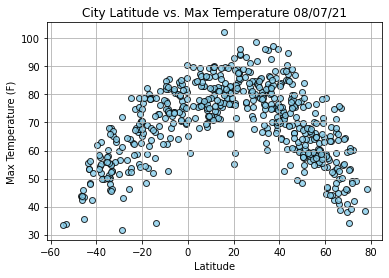

In [37]:
# Build scatter plot for latitude vs max temp
plt.scatter(lats, max_temps, c="skyblue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate graph properties
plt.title(f"City Latitude vs. Max Temperature " + today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig1.png")

plt.show()

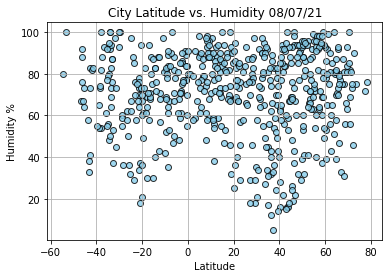

In [41]:
# Build scatter plot for latitude vs humidity
plt.scatter(lats, humidity, c="skyblue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate graph properties
plt.title(f"City Latitude vs. Humidity " + today)
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig2.png")

plt.show()

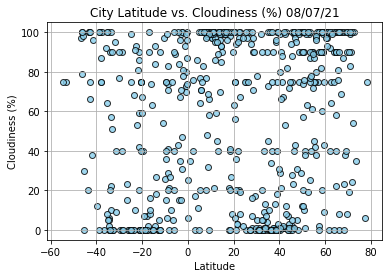

In [42]:
# Build scatter plot for latitude vs cloudiness
plt.scatter(lats, cloudiness, c="skyblue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + today)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig3.png")

plt.show()

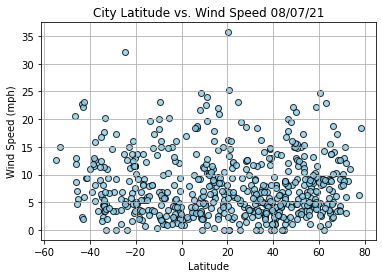

In [43]:
# Build scatter plot for latitude vs wind speed
plt.scatter(lats, wind_speed, c="skyblue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate graph properties
plt.title(f"City Latitude vs. Wind Speed " + today)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig4.png")

plt.show()